In [76]:
# Copyright 2019 dpthinker. All Rights Researved.
# Changed for the book:  A Concise Handbook of TensorFlow 2.0
# 
# Copyright 2019 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

In [78]:
def crop_center(image):
    """Returns a cropped square image."""
    shape = image.shape
    new_shape = min(shape[1], shape[2])
    offset_y = max(shape[1] - shape[2], 0) // 2
    offset_x = max(shape[2] - shape[1], 0) // 2
    image = tf.image.crop_to_bounding_box(image, offset_y, offset_x, new_shape, new_shape)
    return image

def load_image_local(image_path, image_size=(512, 512), preserve_aspect_ratio=True):
    """Loads and preprocesses images."""
    # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
    img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
    if img.max() > 1.0:
        img = img / 255.
    if len(img.shape) == 3:
        img = tf.stack([img, img, img], axis=-1)
    img = crop_center(img)
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

def show_image(image, title):
    plt.imshow(image, aspect='equal')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [79]:
content_image_path = "contentimg.jpeg"
style_image_path = "styleimg5.jpeg"

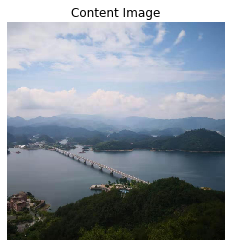

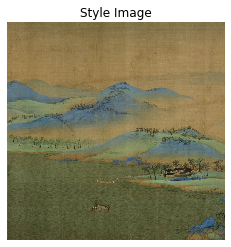

In [80]:
content_image = load_image_local(content_image_path)
style_image = load_image_local(style_image_path)

show_image(content_image[0], "Content Image")
show_image(style_image[0], "Style Image")

In [81]:
# Load image stylization module.
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2');

In [82]:
# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

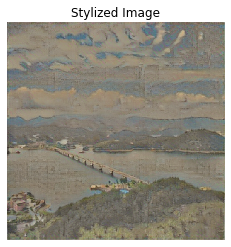

In [83]:
show_image(stylized_image[0], "Stylized Image")